## Statistics

In [1]:
# Hypothesis Testing
# T test - One Sample
import numpy as np
import pandas as pd
import math
import scipy.stats as stats

In [3]:
np.random.seed(6)

population_ages1=stats.poisson.rvs(loc=18,mu=35,size=150000)
population_ages2=stats.poisson.rvs(loc=18,mu=10,size=100000)
population_ages=np.concatenate((population_ages1,population_ages2))

bangalore_ages1=stats.poisson.rvs(loc=18,mu=30,size=30)
bangalore_ages2=stats.poisson.rvs(loc=18,mu=10,size=20)
bangalore_ages=np.concatenate((bangalore_ages1,bangalore_ages2))

print(population_ages.mean())
print(bangalore_ages.mean())

43.000112
39.26


In [4]:
stats.ttest_1samp(a=bangalore_ages, popmean=population_ages.mean())

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

In [2]:
# T test - Two Sample
from scipy import stats

a=[10,12,9,11,11,12,9,11,9,9]
b=[13,11,9,12,12,11,12,12,10,11]
test=stats.ttest_ind(a,b)
test

Ttest_indResult(statistic=-1.8534061896456464, pvalue=0.08028906893163547)

In [4]:
c=[13,12,9,12,12,13,12,13,10,11]
test=stats.ttest_ind(a,c)
test

Ttest_indResult(statistic=-2.4168284181234285, pvalue=0.026494688246160383)

In [15]:
#ANOVA
# F test
# One Way ANOVA
import pandas as pd

In [16]:
data=pd.read_csv('G:\My Documents\Technical\Data Science - ML\Data Files/PlantGrowth.csv')
data.head()

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [8]:
data.shape

(30, 3)

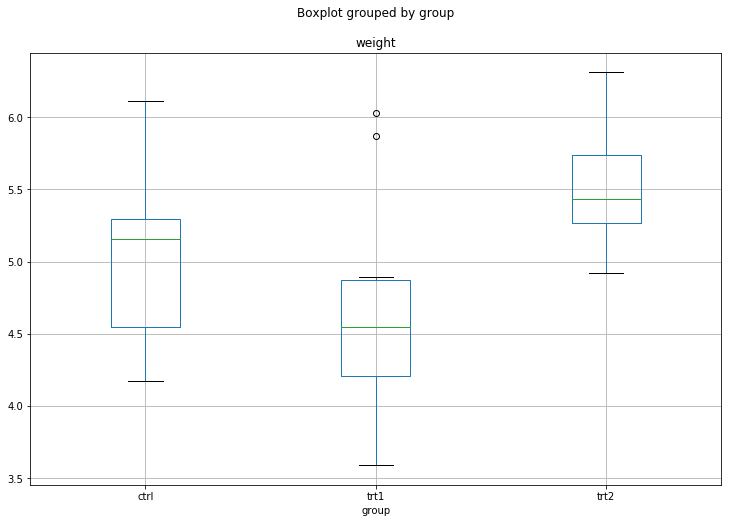

In [17]:
from matplotlib import pyplot as plt
data.boxplot('weight', by='group', figsize=(12,8))

In [22]:
grps=pd.unique(data.group.values)
d_data={grp:data['weight'][data.group==grp] for grp in grps}

from scipy import stats
F,p = stats.f_oneway(d_data['ctrl'],d_data['trt1'],d_data['trt2'])
print('F value is:',F)
print('P value is:',p)

F value is: 4.846087862380136
P value is: 0.0159099583256229


In [1]:
# Two Way ANOVA
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
import scipy.stats as stats

In [2]:
data = pd.read_csv('G:\My Documents\Technical\Data Science - ML\Data Files/ToothGrowth.csv')

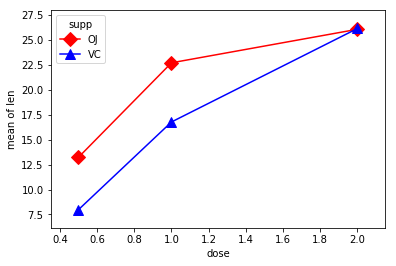

In [3]:
fig = interaction_plot(data.dose, data.supp, data.len, colors= ['red', 'blue'], markers= ['D','^'], ms=10)

In [4]:
data.shape

(60, 4)

In [5]:
data.head()

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5


In [6]:
# Degrees of Freedom
N=len(data.len)
df_a=len(data.supp.unique())-1
df_b=len(data.dose.unique())-1
df_axb=df_a*df_b
df_w = N - (len(data.supp.unique())*data.dose.unique())

In [7]:
df_w

array([59., 58., 56.])

In [11]:
df_a

1

In [10]:
df_b

2

In [12]:
df_axb

2

In [27]:
# Sum of Squares
grand_mean = data['len'].mean()
ssq_a = sum([(data[data.supp==l].len.mean()-grand_mean)**2 for l in data.supp])
ssq_b = sum([(data[data.dose==l].len.mean()-grand_mean)**2 for l in data.dose])
ssq_t = sum((data.len - grand_mean)**2)

vc = data[data.supp == 'VC']
oj = data[data.supp == 'OJ']
vc_dose_means = [vc[vc.dose ==d].len.mean() for d in vc.dose]
oj_dose_means = [oj[oj.dose ==d].len.mean() for d in oj.dose]

ssq_w = sum((oj.len - oj_dose_means)**2) +sum((vc.len - vc_dose_means)**2)

ssq_axb = ssq_t-ssq_a-ssq_b-ssq_w

In [28]:
ssq_a

205.35000000000005

In [29]:
ssq_b

2426.434333333332

In [30]:
ssq_t

3452.2093333333332

In [31]:
vc

,Unnamed: 0,len,supp,dose
0,1,4.2,VC,0.5
1,2,11.5,VC,0.5
2,3,7.3,VC,0.5
3,4,5.8,VC,0.5
4,5,6.4,VC,0.5
5,6,10.0,VC,0.5
6,7,11.2,VC,0.5
7,8,11.2,VC,0.5
8,9,5.2,VC,0.5
9,10,7.0,VC,0.5


In [32]:
oj

,Unnamed: 0,len,supp,dose
30,31,15.2,OJ,0.5
31,32,21.5,OJ,0.5
32,33,17.6,OJ,0.5
33,34,9.7,OJ,0.5
34,35,14.5,OJ,0.5
35,36,10.0,OJ,0.5
36,37,8.2,OJ,0.5
37,38,9.4,OJ,0.5
38,39,16.5,OJ,0.5
39,40,9.7,OJ,0.5


In [33]:
vc_dose_means

[7.980000000000001,
 7.980000000000001,
 7.980000000000001,
 7.980000000000001,
 7.980000000000001,
 7.980000000000001,
 7.980000000000001,
 7.980000000000001,
 7.980000000000001,
 7.980000000000001,
 16.77,
 16.77,
 16.77,
 16.77,
 16.77,
 16.77,
 16.77,
 16.77,
 16.77,
 16.77,
 26.139999999999997,
 26.139999999999997,
 26.139999999999997,
 26.139999999999997,
 26.139999999999997,
 26.139999999999997,
 26.139999999999997,
 26.139999999999997,
 26.139999999999997,
 26.139999999999997]

In [34]:
oj_dose_means

[13.23,
 13.23,
 13.23,
 13.23,
 13.23,
 13.23,
 13.23,
 13.23,
 13.23,
 13.23,
 22.7,
 22.7,
 22.7,
 22.7,
 22.7,
 22.7,
 22.7,
 22.7,
 22.7,
 22.7,
 26.060000000000002,
 26.060000000000002,
 26.060000000000002,
 26.060000000000002,
 26.060000000000002,
 26.060000000000002,
 26.060000000000002,
 26.060000000000002,
 26.060000000000002,
 26.060000000000002]

In [35]:
ssq_w

712.106

In [36]:
ssq_axb

108.31900000000155

In [37]:
# Mean Squares
ms_a = ssq_a/df_a
ms_b = ssq_b/df_b
ms_axb = ssq_axb/df_axb
ms_w = ssq_w/df_w

In [38]:
# F ratio : f ratio or f-test
f_a = ms_a/ms_w
f_b = ms_b/ms_w
f_axb = ms_axb/ms_w

In [39]:
# Obtaining p-values
p_a = stats.f.sf(f_a, df_a, df_w)
p_b = stats.f.sf(f_b, df_b, df_w)
p_axb = stats.f.sf(f_axb, df_axb, df_w)

In [40]:
# Result in  DataFrame
results = {'sum_sq':[ssq_a, ssq_b, ssq_axb, ssq_w], 'df':[df_a, df_b, df_axb, df_w], 'F':[f_a, f_b, f_axb, 'NaN'], 'PR(>F)':[p_a, p_b, p_axb, 'NaN']}
columns = ['sum_sq', 'df', 'F', 'PR(>F)']

aov_tablel = pd.DataFrame(results, columns=columns, index=['supp', 'dose', 'supp:dose', 'Residual'])
aov_tablel

,sum_sq,df,F,PR(>F)
supp,205.350000,1,"[17.013829401802543, 16.725459411941486, 16.14...","[0.00011791021047704304, 0.0001348721045701227..."
dose,2426.434333,2,"[100.51848016072506, 98.81477710715346, 95.407...","[9.922005450847645e-20, 2.083008277900708e-19,..."
supp:dose,108.319000,2,"[4.487268047172816, 4.411212656542769, 4.25910...","[0.01534333966454166, 0.01646899204339833, 0.0..."
Residual,712.106000,"[59.0, 58.0, 56.0]",NaN,NaN
